## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

In [6]:
# Creating database
import pandas as pd
import numpy as np

# Import SQLAlchemy `automap` and other dependencies here
### BEGIN SOLUTION
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Create an engine for the `hawaii.sqlite` database
engine = create_engine("sqlite:///hawaii.sqlite")

# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

# Start a session to query the database
session = Session(engine)

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [2]:
# Use Inspector to print the column names and types
### BEGIN SOLUTION
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])
### END SOLUTION

print('\n')
# Using the inspector to print the column names within the 'measurement' table and its types
### BEGIN SOLUTION
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
### END SOLUTION


id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [3]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [4]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

<center><img src='images/precip.png' /></center>

* Use Pandas to print the summary statistics for the precipitation data.

#### SQLAlchemy Method

In [171]:
# Query Measurement for `date` and `prcp` and save the query into results
### BEGIN SOLUTION
results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()
### END SOLUTION

prcp_dfv1 = pd.DataFrame(results, columns=['date', 'prcp'])

print("max date:" , prcp_dfv1.date.max(),", min date:" ,  prcp_dfv1.date.min())

prcp_dfv1.head()

max date: 2017-08-23 , min date: 2010-01-01


,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [173]:
## Show data per line
# date_list = prcp_dfv1.date.unique()
# for n in date_list:
#     print(n)

prcp_dfv1.date = pd.to_datetime(prcp_dfv1.date)
prcp_dfv1 = prcp_dfv1.reset_index(drop=True)
#prcp_dfv1 = prcp_dfv1.set_index('date')
prcp_dfv1.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00


In [174]:
prcp_p12mo_dfv1 = prcp_dfv1[(prcp_dfv1['date'] > '2016-09-01') & (prcp_dfv1['date'] < '2017-08-23')]
prcp_p12mo_dfv1 = prcp_p12mo_dfv1.set_index('date')

print("N Data Points = ", len(prcp_p12mo_dfv1))

prcp_p12mo_dfv1.head()

## ix Method still needs work
# prcp_p12mo_dfv1 = prcp_dfv1.ix['2016-09-01':'2017-08-23']
# prcp_p12mo_dfv1 = prcp_dfv1[prcp_dfv1.date = '2010-01-01':'2010-12-31']

N Data Points =  2161


,prcp
date,
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


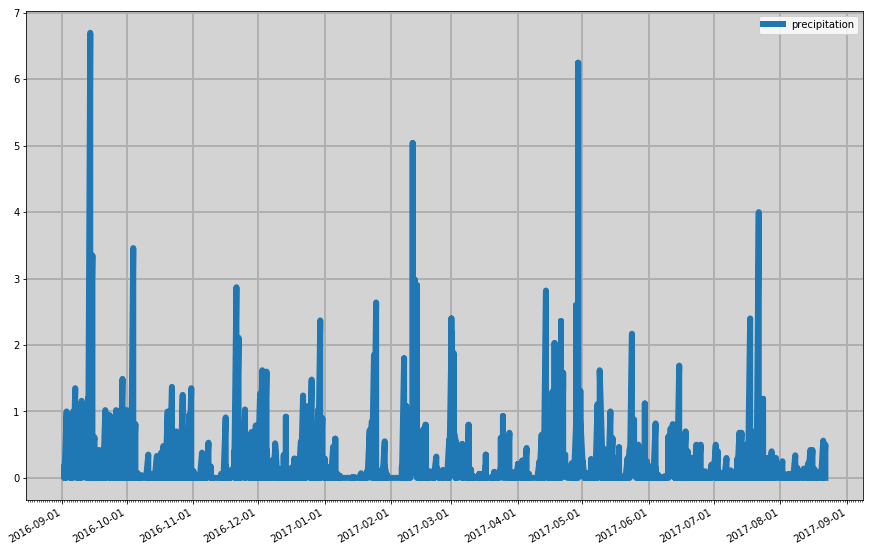

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(prcp_p12mo_dfv1.index, prcp_p12mo_dfv1.prcp, label='precipitation', linewidth=6)

# assign locator and formatter for the xaxis ticks.
day = mdates.DayLocator()   # every day
months = mdates.MonthLocator()  # every month
monthFmt = mdates.DateFormatter('%Y-%m-%d') #formatting of labels

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_minor_locator(day)
ax.grid(linestyle='-', linewidth=2)
ax.set_facecolor('lightgray')
# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
ax.legend()

plt.show()

#### Pandas read_sql_query alternative

In [146]:
conn = engine.connect()
preciptation_df = pd.read_sql_query("SELECT date, \
                                    prcp FROM measurement", conn)
preciptation_df.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,0.00


In [148]:
preciptation_df.info()
print("\n","max date:" , preciptation_df.date.max(),", min date:" ,  preciptation_df.date.min())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 2 columns):
date    19550 non-null object
prcp    19550 non-null float64
dtypes: float64(1), object(1)
memory usage: 305.5+ KB

 max date: 2017-08-23 , min date: 2010-01-01


In [149]:
preciptation_df.date = pd.to_datetime(preciptation_df.date)
preciptation_df = preciptation_df.set_index('date')

In [150]:
preciptation12mo_df = preciptation_df.ix['2016-09-01':'filter']
preciptation12mo_df.head()

/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,prcp
date,
2016-09-01,0.00
2016-09-02,0.00
2016-09-03,0.00
2016-09-04,0.03
2016-09-05,0.00


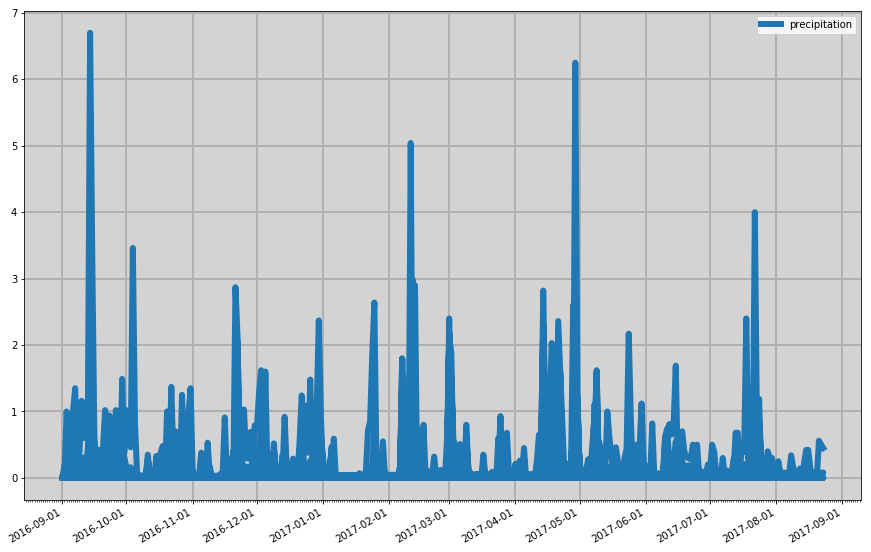

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(preciptation12mo_df.index, preciptation12mo_df.prcp, label='precipitation', linewidth=6)

# assign locator and formatter for the xaxis ticks.
day = mdates.DayLocator()   # every day
months = mdates.MonthLocator()  # every month
monthFmt = mdates.DateFormatter('%Y-%m-%d') #formatting of labels

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthFmt)
ax.xaxis.set_minor_locator(day)
ax.grid(linestyle='-', linewidth=2)
ax.set_facecolor('lightgray')
# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
ax.legend()

plt.show()

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>

In [214]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station

# Start a session to query the database
session = Session(engine)

In [215]:
# Query Measurement for `date` and `prcp` and save the query into results
### BEGIN SOLUTION
results2 = session.query(Measurement.station, Station.name, \
                         func.count(Measurement.station). \
                         label('station_count')) \
                        .join(Station, Measurement.station==Station.station) \
                        .group_by(Measurement.station) \
                        .order_by('station_count DESC').all()
### END SOLUTION



/Users/jbui/anaconda3/lib/python3.6/site-packages/sqlalchemy/sql/compiler.py:624: SAWarning: Can't resolve label reference 'station_count DESC'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


In [216]:
tobs_df1 = pd.DataFrame(results2, columns=['station', 'name','station_count'])
tobs_df1.head()

,station,name,station_count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612


In [217]:
print('Station with the highest observations is', tobs_df1.station[0], tobs_df1.name[0])

Station with the highest observations is USC00519281 WAIHEE 837.5, HI US


In [218]:
tobs_df1 = pd.read_sql_query("SELECT date, tobs \
                            FROM measurement \
                            WHERE station = 'USC00519281'", conn)
tobs_df1.date = pd.to_datetime(tobs_df1.date)
tobs_df1 = tobs_df1.set_index('date')
tobs12mo_df1 = tobs_df1.ix['2010-01-01':'2010-12-31']
tobs12mo_df1.info()

tobs12mo_df1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2010-01-01 to 2010-12-31
Data columns (total 1 columns):
tobs    364 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,tobs
date,
2010-01-01,70
2010-01-02,62
2010-01-03,74
2010-01-04,75
2010-01-05,74


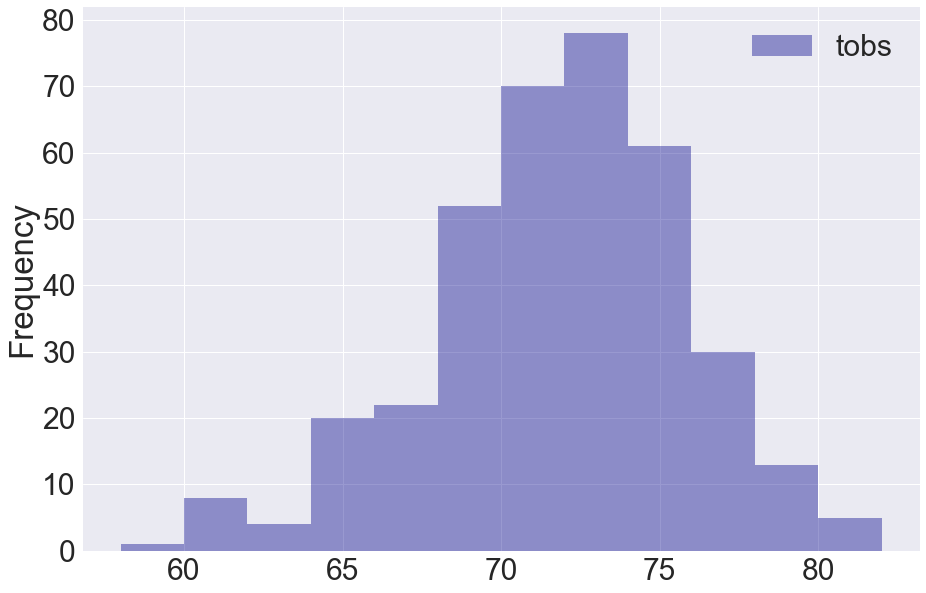

In [219]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.set(font_scale=3)
ax = sns.distplot(tobs12mo_df1, bins=12, \
                  kde=False, label = 'tobs', \
                  color = 'darkblue')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

#### Pandas read_sql_query alternative

In [13]:
stations = pd.read_sql_query("SELECT measurement.station, station.name, COUNT(measurement.station) AS `Observations` \
                       FROM measurement \
                       JOIN station \
                       ON station.station=measurement.station \
                       GROUP BY measurement.station \
                       ORDER BY Observations DESC", conn)
stations.head()

,station,name,Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612


In [14]:
print('Station with the highest observations is', stations.station[0], stations.name[0])

Station with the highest observations is USC00519281 WAIHEE 837.5, HI US


In [18]:
tobs_df = pd.read_sql_query("SELECT date, tobs \
                            FROM measurement \
                            WHERE station = 'USC00519281'", conn)
tobs_df.date = pd.to_datetime(tobs_df.date)
tobs_df = tobs_df.set_index('date')
tobs12mo_df = tobs_df.ix['2010-01-01':'2010-12-31']
tobs12mo_df.info()

tobs12mo_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2010-01-01 to 2010-12-31
Data columns (total 1 columns):
tobs    364 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,tobs
date,
2010-01-01,70
2010-01-02,62
2010-01-03,74
2010-01-04,75
2010-01-05,74


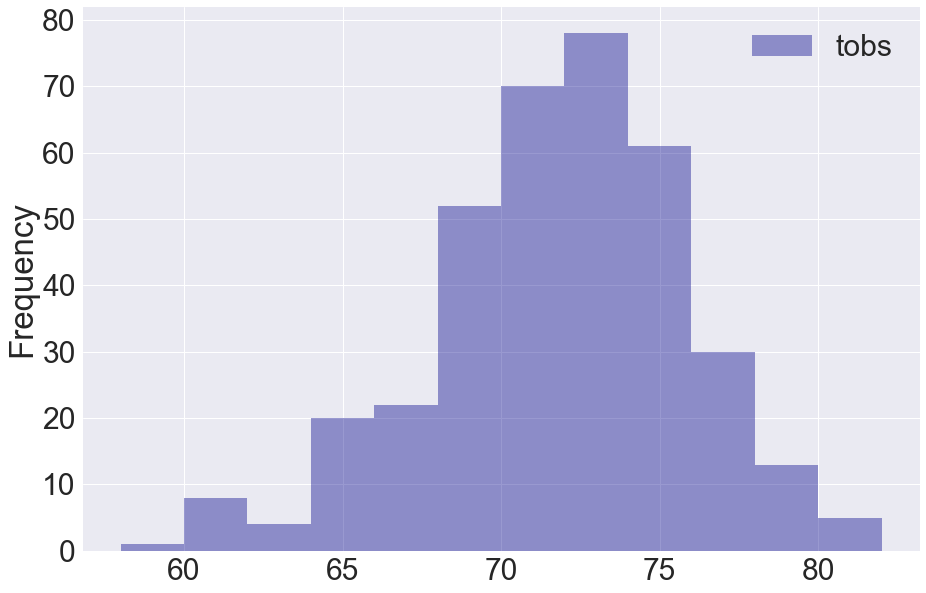

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.set(font_scale=3)
ax = sns.distplot(tobs12mo_df, bins=12, \
                  kde=False, label = 'tobs', \
                  color = 'darkblue')
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_, or_

#################################################
# Function to check datetime input
#################################################    
import datetime
from datetime import datetime

def validate(date_text):
    try:
        if date_text != datetime.strptime(date_text, "%Y-%m-%d").strftime('%Y-%m-%d'):
            raise ValueError
        return True
    except ValueError:
        return False
#################################################
# 
#################################################


def calc_temps():
    
    i = True
    while i:
        start_date = input(" Please enter your start date (YYYY-MM-DD): ")
        if validate(start_date) == False:
            print("Please enter the date in the correct format!")
            continue
        elif validate(start_date) == True:
            i = False

    k = True
    while k:
        end_date = input(" Please enter your end date (YYYY-MM-DD): ")
        if validate(end_date) == False:
            print("Please enter the date in the correct format!")
            continue
        elif validate(end_date) == True:
            k = False
            
    # min, avg, and max temperatures
    results = session.query(
        func.avg(Measurement.tobs).label('avg_temp'), \
        func.max(Measurement.tobs).label('max_temp'), \
        func.min(Measurement.tobs).label('min_temp')) \
        .filter(and_(Measurement.date >= '2017-01-01', \
        Measurement.date <= '2018-01-01')).all()

    two_dates = []
    for result in results:
        row = {}
        row["avg_temp"] = result[0]
        row["max_temp"] = result[1]
        row["min_temp"] = result[2]
        two_dates.append(row)
    temp_stats = pd.DataFrame(two_dates)
        
    print('minimum temperature is', temp_stats.min_temp[0], '\n'
         'maximum temperature is', temp_stats.max_temp[0], '\n'
         'average temperature is', temp_stats.avg_temp[0], '\n')

    import numpy as np
    yticks = np.arange(0,115,10)
    y_err = temp_stats.max_temp-temp_stats.min_temp

    fig, ax = plt.subplots(figsize=(1,10))
    ax = plt.bar(0, temp_stats.avg_temp, 0.1, align='center', yerr = y_err)
    ax = plt.ylabel('Temp(F)')
    ax = plt.yticks(yticks, yticks)
    ax = plt.xticks([])
    plt.show()


 Please enter your start date (YYYY-MM-DD): asdf
Please enter the date in the correct format!
 Please enter your start date (YYYY-MM-DD): 2017-01-01
 Please enter your end date (YYYY-MM-DD): asdf
Please enter the date in the correct format!
 Please enter your end date (YYYY-MM-DD): 2018-01-01
minimum temperature is 58 
maximum temperature is 87 
average temperature is 74.1438797423 



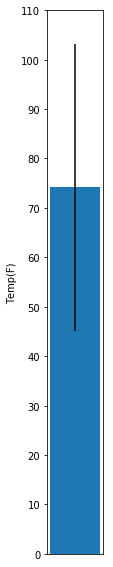

In [10]:
# start_date = '2017-01-01'
# end_date = '2018-01-01'
calc_temps()

### Pandas read_sql_query alternative

In [27]:
def calc_temps():
    start_date = input('Enter your start date (YYYY-MM-DD): ')
    end_date = input('Enter your end date (YYYY-MM-DD): ')
    
    # min, avg, and max temperatures
    temps_df = pd.read_sql_query("SELECT date, tobs \
                            FROM measurement", conn)
    temps_df.date = pd.to_datetime(temps_df.date)
    temps_df = temps_df.set_index('date')
    temps_intrst = temps_df.ix[start_date:end_date]
    min_temp = temps_intrst.tobs.min()
    max_temp = temps_intrst.tobs.max()
    avg_temp = temps_intrst.tobs.mean()
    print('minimum temperature is', min_temp, '\n'
         'maximum temperature is', max_temp, '\n'
         'average temperature is', avg_temp, '\n')
    
    import numpy as np
    yticks = np.arange(0,115,10)
    y_err = max_temp-min_temp

    fig, ax = plt.subplots(figsize=(1,10))
    ax = plt.bar(0, avg_temp, 0.1, align='center', yerr = y_err)
    ax = plt.ylabel('Temp(F)')
    ax = plt.yticks(yticks, yticks)
    ax = plt.xticks([])
    plt.show()


Enter your start date (YYYY-MM-DD): 2017-01-01
Enter your end date (YYYY-MM-DD): 2018-01-01
minimum temperature is 58 
maximum temperature is 87 
average temperature is 74.14387974230493 



/Users/jbui/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


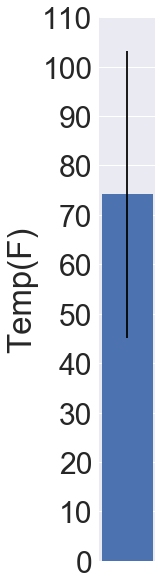

In [30]:
# start_date = '2017-01-01'
# end_date = '2018-01-01'
calc_temps()

### Optional Recommended Analysis

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

  * Calcualte the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

  * Create a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

  * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

  * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

  * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

  <center><img src="images/daily_normals.png" /></center>

## Step 4 - Climate App

Now that you have completed your initial analysis, design a Flask api based on the queries that you have just developed.

* Use FLASK to create your routes.

### Routes

* `/api/v1.0/precipitation`

  * Query for the dates and temperature observations from the last year.

  * Convert the query results to a Dictionary using `date` as the key and `tobs` as the value.

  * Return the json representation of your dictionary.

* `/api/v1.0/stations`

  * Return a json list of stations from the dataset.

* `/api/v1.0/tobs`

  * Return a json list of Temperature Observations (tobs) for the previous year

* `/api/v1.0/<start>` and `/api/v1.0/<start>/<end>`

  * Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.

  * When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.

  * When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive.

## Hints

* You will need to join the station and measurement tables for some of the analysis queries.

* Use Flask `jsonify` to convert your api data into a valid json response object.

In [52]:
import datetime as dt
import numpy as np
import pandas as pd

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, and_, or_

from flask import Flask, jsonify


#################################################
# Database Setup
#################################################
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to the invoices and invoice_items tables
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create our session (link) from Python to the DB
session = Session(engine)

#################################################
# Flask Setup
#################################################
app = Flask(__name__)


#################################################
# Flask Routes
#################################################

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Avalable Routes:<br/> "

        f"/api/v1.0/precipitation "
        f" - List of dates and temperature observations from the last year<br/>"

        f"/api/v1.0/stations "
        f" - List of stations<br/>"

        f"/api/v1.0/tobs "
        f" - List of Temperature Observations (tobs) for the previous year<br/>"

        f"/api/v1.0/<start> "
        f" - Calculates `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date<br/>"
        
        f"/api/v1.0/<start>/<end> "
        f" - Calculates the `TMIN`, `TAVG`, and `TMAX` for dates between the start and end date inclusive<br/>"
    )


@app.route("/api/v1.0/precipitation")
def precipitation():
    """Query for the dates and temperature observations from the last year.
    Convert the query results to a Dictionary using date as the key and tobs as the value.
    Return the json representation of your dictionary."""
    # Query for the dates and temperature observations from the last year.
    results = session.query(Measurement.date, Measurement.prcp).\
    filter(and_(Measurement.date >= '2017-01-01', \
                   Measurement.date <= '2017-12-31')).all()

    # Convert the query results to a Dictionary using date as the key and tobs as the value.
    # Create a list of dicts with `date` and `tobs` as the keys and
    precipitation = []
    for result in results:
        row = {}
        row["date"] = result[0]
        row["tobs"] = float(result[1])
        precipitation.append(row)
    # Return the json representation of your dictionary.         
    return jsonify(precipitation)

@app.route("/api/v1.0/stations")
def stations():
    """Return a json list of stations from the dataset."""
    # Query all stations from the Stations table
    results = session.query(Station.station).all()

    # Convert list of tuples into normal list
    stations = list(np.ravel(results))
    return jsonify(stations)


@app.route("/api/v1.0/tobs")
def temp_observed():
    """Return a json list of Temperature Observations (tobs) for the previous year"""
    results = session.query(Measurement.tobs)\
        .filter(and_(Measurement.date >= '2017-01-01', \
        Measurement.date <= '2017-12-31')).all()

# dict keys that are not of a basic type 
# (str, unicode, int, long, float, bool, None) will through TypeError
    temp_list = []
    for result in results:
        temp_list.append(float(result[0]))

    return jsonify(temp_list)
              
@app.route("/api/v1.0/<start>")
def start_date(start='2010-01-01'):
# start="2010-01-01"
    results = session.query(Measurement.date, \
        func.avg(Measurement.tobs).label('TAVG'), \
        func.max(Measurement.tobs).label('TMAX'), \
        func.min(Measurement.tobs).label('TMIN')) \
        .group_by(Measurement.date)\
        .filter(Measurement.date >= start).all()

    one_date = []
    for result in results:
        row = {}
        row["date"] = result[0]
        row["TAVG"] = result[1]
        row["TMAX"] = result[2]
        row["TMIN"] = result[3]
        one_date.append(row)
    # Return the json representation of your dictionary.         
    return jsonify(one_date)

@app.route("/api/v1.0/<start>/<end>")
def start_to_end_dates(start='2010-01-01',end='2010-12-31'):
    """Return a json list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
    When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
    When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive."""
    # Calculate the total for a given country

    results = session.query(Measurement.date, \
        func.avg(Measurement.tobs).label('TAVG'), \
        func.max(Measurement.tobs).label('TMAX'), \
        func.min(Measurement.tobs).label('TMIN')) \
        .filter(and_(Measurement.date >= start, \
        Measurement.date <= end)).group_by(Measurement.date).all()

    stats = []
    for result in results:
        row = {}
        row["date"] = result[0]
        row["TAVG"] = result[1]
        row["TMAX"] = result[2]
        row["TMIN"] = result[3]
        stats.append(row)


    return jsonify(stats)

if __name__ == '__main__':
    app.debug = True
    app.run()

SyntaxError: invalid syntax (<ipython-input-52-6ef6073a0e4b>, line 104)

# TEST BOX